In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import rasterio
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanIoU, IoU


In [9]:
from satellitecrops.interface.main import train

train('../data/eopatches')


⭐️ Use case: train

Loading preprocessed validation data...
Creating X and y ...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,462 (7.41 MB)

 Trainable params: 1,941,462 (7.41 MB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/100
34/62 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - io_u: 0.1802 - io_u_1: 0.0013 - io_u_10: 2.8092e-05 - io_u_11: 1.0263e-05 - io_u_12: 0.0000e+00 - io_u_13: 0.0000e+00 - io_u_14: 0.0115 - io_u_15: 0.0074 - io_u_16: 3.3348e-04 - io_u_17: 3.0380e-04 - io_u_18: 0.0000e+00 - io_u_19: 0.0010 - io_u_2: 5.4420e-04 - io_u_20: 0.0077 - io_u_21: 0.0034 - io_u_3: 0.0000e+00 - io_u_4: 0.0000e+00 - io_u_5: 0.0000e+00 - io_u_6: 0.0012 - io_u_7: 1.9472e-05 - io_u_8: 2.4216e-04 - io_u_9: 0.0000e+00 - loss: 0.6624 - mean_io_u: 0.0098 

KeyboardInterrupt: 

In [5]:
mapping = {0:'Unknown',
           1:'Unknown cropland',
           2:'Cereals',
           4:'Woods and tree crops',
           7:'Forage',
           9:'Maize',
           12:'Rice',
           3:'Unknown cropland',
           5:'Unknown cropland',
           6:'Unknown cropland',
           8:'Unknown cropland',
           10:'Unknown cropland',
           11:'Unknown cropland',
           13:'Unknown cropland',
           14:'Unknown cropland',
           15:'Unknown cropland',
           16:'Unknown cropland',
           20:'Unknown cropland',
           1:'Unknown cropland',
           17:'No agricultural land',
           18:'No agricultural land',
           19:'No agricultural land',
           21:'No agricultural land'}

# Preprocessing

In [6]:
def scaling(arr:list, pos:int, a:float=0, b:float=1, clip:bool=True, temporal:bool=False):
    '''
    Performs a linear transformation on each channel of a given satellite image. Array must be of dimension 4.

    normalized_band = (value - c) * (b - a) / (d - c) + a

    https://medium.com/sentinel-hub/how-to-normalize-satellite-images-for-deep-learning-d5b668c885af

    arr : array to be scaled with a linear transformation
    pos : index of the number of channels
    a : lower limit of the resulting range
    b : upper limit of the resulting range
    clip : whether to bound the interval or not
    temporal : boolean to indicate if we have temporal dimension
    '''

    if pos != arr.ndim-1:
        if pos != -1:
            arr = np.moveaxis(arr, pos, -1)

    # Linear normalization https://medium.com/sentinel-hub/how-to-normalize-satellite-images-for-deep-learning-d5b668c885af
    res = []


    for i in range(arr.shape[-1]):
        band = arr[:,:,:,:,i] if temporal else arr[:,:,:,i]
        c = np.percentile(band, 1)
        d = np.percentile(band, 99)
        normalized_band = (band - c) * (b - a) / (d-c) + a
        res.append(normalized_band)

    if clip==True:
        return np.clip(np.stack(res, axis=pos),0,1)

    return np.stack(res, axis=pos)

In [7]:
import os
import gzip
import numpy as np
import rasterio

X_path = []
Y_path = []

for files in os.listdir('../data/eopatches'):
    for name in files:
        if name == 'BANDS.npy.gz':
            X_path.append(os.path.join(root, name))
        if name == 'MASK.npy.gz':
            Y_path.append(os.path.join(root, name))

X = []
y = []


for i,y_path in enumerate(Y_path):
    with gzip.open(y_path) as f:
        y.append(np.load(f))

y = np.stack(y)

y.shape


ValueError: need at least one array to stack

In [6]:
for files in os.listdir('../data/eopatches'):
    print(files)

.DS_Store
eopatch_6
eopatch_1
eopatch_8
eopatch_9
eopatch_0
eopatch_7
eopatch_2
eopatch_5
eopatch_4
eopatch_3


In [7]:
y = np.load('../data/kaggle_dataset/y.npy')
y = y-1 #First category must be 0
y = np.moveaxis(y, 1, 3)
y.shape

(3328, 48, 48, 1)

# Unet Model

In [8]:
def metrics(n_classes:int, sparse_y_pred:bool=False, sparse_y_true:bool=False):
    '''
    Return a list with MeanIoU as first argument and IoU for each given class.
    '''
    l = [MeanIoU(num_classes=n_classes, sparse_y_pred=sparse_y_pred, sparse_y_true=sparse_y_true)]

    for i in range(n_classes):
        l.append(IoU(num_classes=n_classes, target_class_ids=[i],sparse_y_pred=sparse_y_pred, sparse_y_true=sparse_y_true))

    return l

In [9]:
#https://youtu.be/csFGTLT6_WQ
# u-net model

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda



################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(21, 1, activation='softmax', padding='same')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalFocalCrossentropy(), metrics=metrics(21)) #Ignore class to exclude background
    model.summary()

    return model

In [13]:
y_cat = tf.keras.utils.to_categorical(y)

y_cat_small = y_cat[:300]

In [43]:
from satellitecrops.preproc import clean_y

# l = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 28])
# d = {}

# for i in range(len(np.unique(l))):
#     if i != l[i]:
#         d[l[i]] = i

# for k,v in d.items():
#     l[l==k] = v
# l

y

ModuleNotFoundError: No module named 'satellitecrops.preproc'

In [14]:
data = np.load('../data/kaggle_dataset/X.npy')
data = scaling(X,1)
data = np.moveaxis(data, 1, 3)
data.shape

(3328, 48, 48, 9)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_cat, test_size=0.2)


In [16]:
model = simple_unet_model(48, 48, 9)

es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=0
    )

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=16,
    callbacks=[es],
    epochs=100)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 9) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │      1,312 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 48, 48,    │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 24, 24,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 24, 24,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 12, 12,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 12, 12,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 6, 6, 128) │     73,856 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 128) │          0 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 6, 6, 128) │    147,584 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 128) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 3, 3, 256) │    295,168 │ max_pooling2d_3[

 Total params: 1,942,309 (7.41 MB)

 Trainable params: 1,942,309 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
 87/134 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - io_u: 0.0000e+00 - io_u_1: 8.9726e-04 - io_u_10: 0.0130 - io_u_11: 0.0000e+00 - io_u_12: 0.0000e+00 - io_u_13: 9.2962e-04 - io_u_14: 0.0000e+00 - io_u_15: 0.0015 - io_u_16: 0.0673 - io_u_17: 0.0000e+00 - io_u_18: 0.0045 - io_u_19: 0.0364 - io_u_2: 0.0000e+00 - io_u_20: 0.0028 - io_u_3: 0.0000e+00 - io_u_4: 0.0000e+00 - io_u_5: 0.0024 - io_u_6: 0.1342 - io_u_7: 0.0034 - io_u_8: 0.2047 - io_u_9: 0.0000e+00 - loss: 0.5388 - mean_io_u: 0.0236

KeyboardInterrupt: 

In [21]:
def plot_lc(metric:str):
    '''
    Plot the learning curves for a given metric. The metric should be written with lower_case_snake.
    ex metric = mean_io_u
    '''
    fig, axs = plt.subplot_mosaic('AB')

    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.suptitle('Learning curves')

    axs['A'].plot(history.history['loss'], label='Train')
    axs['A'].plot(history.history['val_loss'], label='Validation')
    axs['A'].set_title('Loss')
    axs['A'].legend()

    axs['B'].plot(history.history[metric], label='Train')
    axs['B'].plot(history.history[f'val_{metric}'], label='Validation')
    axs['B'].set_title(metric)
    axs['B'].legend()

    fig.show()


In [22]:
def plot_multiple_lc(history:dict, n_classes:int, classes:list, mapping:dict):
    '''
    Plot the learning curves with loss, mean_iou and some iou of given classes.

    history : History of the model
    n_classes : number of classes we want to predict
    classes : list of integers representing the categories for which we would like to plot the IoU
    mapping : dictionnary with key corresponding to the label of the category and value is the name of the category
    '''

    keys = list(history.history.keys())

    fig, axs = plt.subplot_mosaic('AC;BB')

    fig.set_figheight(13)
    fig.set_figwidth(13)
    fig.suptitle('Learning curves')

    axs['A'].plot(history.history['loss'], label='Train')
    axs['A'].plot(history.history['val_loss'], label='Validation')
    axs['A'].set_title('Loss')
    axs['A'].legend()

    for i in classes:
        axs['B'].plot(history.history[keys[i]], label=f'Train - {mapping[i]}')
        axs['B'].plot(history.history[f'val_{keys[i]}'], label=f'Validation - {mapping[i]}')

    axs['B'].set_title('IoU per class')
    axs['B'].legend(loc='right')

    axs['C'].plot(history.history[keys[n_classes+1]], label='Train')
    axs['C'].plot(history.history[keys[-1]], label='Validation')
    axs['C'].set_title('Mean IoU')
    axs['C'].legend()

    fig.show()

In [23]:
unique, counts = np.unique(y, return_counts=True)

arr = np.array((unique, (counts / counts.sum())*100), dtype=int).T

l = []

for val in arr:
    if val[1]!=0:
        l.append(val[0])

l

[1, 3, 4, 5, 6, 8, 10, 14, 16, 19]

/var/folders/l5/vly43pj15qx6yny3zx9z54pr0000gn/T/ipykernel_2635/3832686600.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


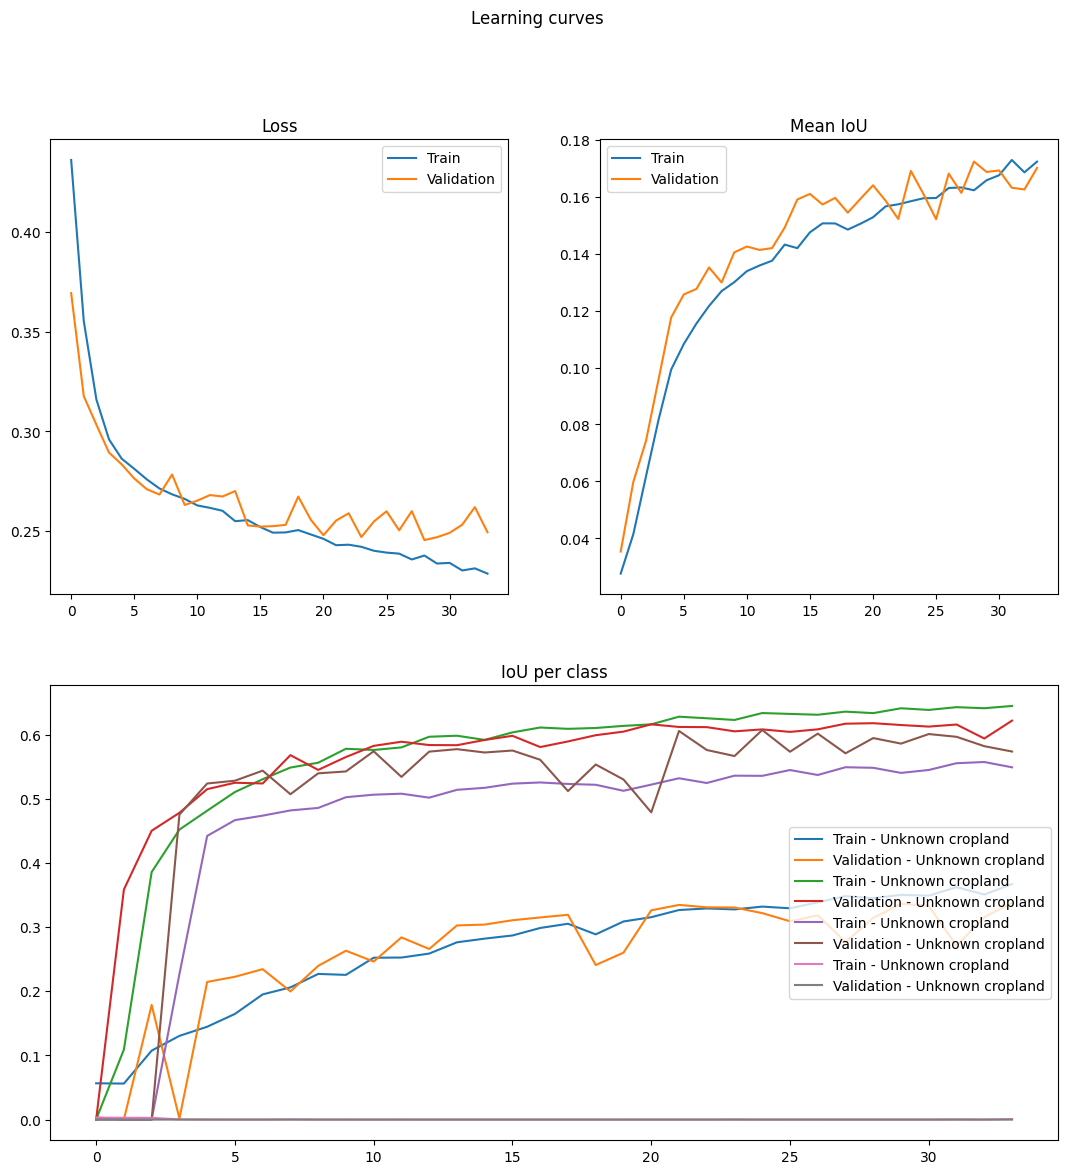

In [24]:
plot_multiple_lc(history, 21, [1,8,10,16], mapping)

In [25]:
y_pred = model.predict(X_test)
y_pred.shape , y_test.shape

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step


((666, 48, 48, 21), (666, 48, 48, 21))

In [26]:
y_pred_sparse = y_pred.argmax(axis=3)
y_truth_sparse = y_test.argmax(axis=3)

In [27]:
def analyse_proportions(y_truth:list, y_pred:list,mapping:dict):
    '''
    Returns a dataframe sorted by proportion of ground truth categories. Compare them to the prediction proportions.

    y_truth :  array corresponding to the ground truth image with labels from 0 to number of classes
    y_pred : array corresponding to the prediction
    mapping : dictionnary with key corresponding to the label of the category and value is the name of the category

    '''
    unique_truth, counts_truth = np.unique(y_truth, return_counts=True)
    prop_truth = np.round(counts_truth / counts_truth.sum() * 100, 1)
    unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
    prop_preds = np.round(counts_pred / counts_pred.sum() *100, 1)

    unique_truth, unique_pred

    df_truth = pd.DataFrame({'Id':unique_truth, 'Truth':prop_truth})
    df_pred = pd.DataFrame({'Id':unique_pred, 'Pred':prop_preds})

    df = df_truth.merge(df_pred, on='Id', how='outer').fillna(0).sort_values('Truth', ascending=False)

    df.set_index('Id', inplace=True)

    a = pd.Series(df.index.map(mapping))
    df.insert(0, 'Category', a)

    return df

analyse_proportions(y_truth_sparse, y_pred_sparse, mapping)

,Category,Truth,Pred
Id,,,
8,Unknown cropland,34.5,55.7
6,Unknown cropland,16.6,16.2
1,Unknown cropland,10.8,11.1
10,No agricultural land,10.7,0.0
16,Unknown cropland,8.8,10.1
19,NaN,5.4,0.7
5,No agricultural land,4.9,0.0
3,Unknown cropland,1.9,1.7
14,Forage,1.8,0.9


In [192]:
import matplotlib as mpl
def plot_comparison(y_truth:list, y_pred:list, n_classes:int, mapping:dict):
    '''
    Plot the ground truth versus the prediction of the model for three random images of the dataset.
    Also plot the difference between ground truth and the prediction, green corresponding to a right prediction.

    y_truth : array with the truth labels
    y_pred : array with the predicted labels
    n_classes : number of categories we want to predict

    '''
    colors = ['mediumseagreen', 'tomato']
    bounds = [0,1]

    cmap = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    colors = ['blue',
            'lightsteelblue',
            'cornflowerblue',
            'slategrey',
            'lavender',
            'salmon',
            'orange',
            'red',
            'orangered',
            'sienna',
            'darkslategray',
            'darkcyan',
            'aqua',
            'skyblue',
            'pink',
            'wheat',
            'bisque',
            'forestgreen',
            'yellow',
            'powderblue',
            'rosybrown']
    bounds = np.arange(n_classes)

    cmapbis = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmapbis.N)

    fig, axs = plt.subplot_mosaic('ABC;DEF;HIJ')

    fig.set_figheight(10)
    fig.set_figwidth(13)
    fig.suptitle('Comparison predictions with ground truth')

    random_val = np.random.randint(0, X_test.shape[0],3)

    axs['A'].imshow(y_truth[random_val[0]], cmap=cmapbis, norm=norm)
    axs['A'].set_title('Ground truth')
    axs['B'].imshow(y_pred[random_val[0]], cmap=cmapbis, norm=norm)
    axs['B'].set_title('Prediction')
    a = y_truth[random_val[0]] - y_pred[random_val[0]]
    axs['C'].imshow(np.where(a == 0, a, 1), cmap=cmap, norm=norm)
    axs['C'].set_title('Difference')

    axs['D'].imshow(y_truth[random_val[1]], cmap=cmapbis, norm=norm)
    axs['E'].imshow(y_pred[random_val[1]], cmap=cmapbis, norm=norm)
    a = y_truth[random_val[1]] - y_pred[random_val[1]]
    axs['F'].imshow(np.where(a == 0, a, 1), cmap=cmap, norm=norm)

    axs['H'].imshow(y_truth[random_val[2]], cmap=cmapbis, norm=norm)
    axs['I'].imshow(y_pred[random_val[2]], cmap=cmapbis, norm=norm)
    a = y_truth[random_val[2]] - y_pred[random_val[2]]
    axs['J'].imshow(np.where(a == 0, a, 1), cmap=cmap, norm=norm)

    # Create custom legend
    legend_elements = [mpl.patches.Patch(facecolor=colors[i], edgecolor='black', label=str(mapping[i])) for i in range(n_classes)]

    # Adjust the layout to make space for the legend
    plt.subplots_adjust(right=0.8)

    # Place legend outside the right side of the plot
    fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(0.82, 0.5), title='Classes')

    fig.show()


/var/folders/l5/vly43pj15qx6yny3zx9z54pr0000gn/T/ipykernel_2672/3292895350.py:83: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


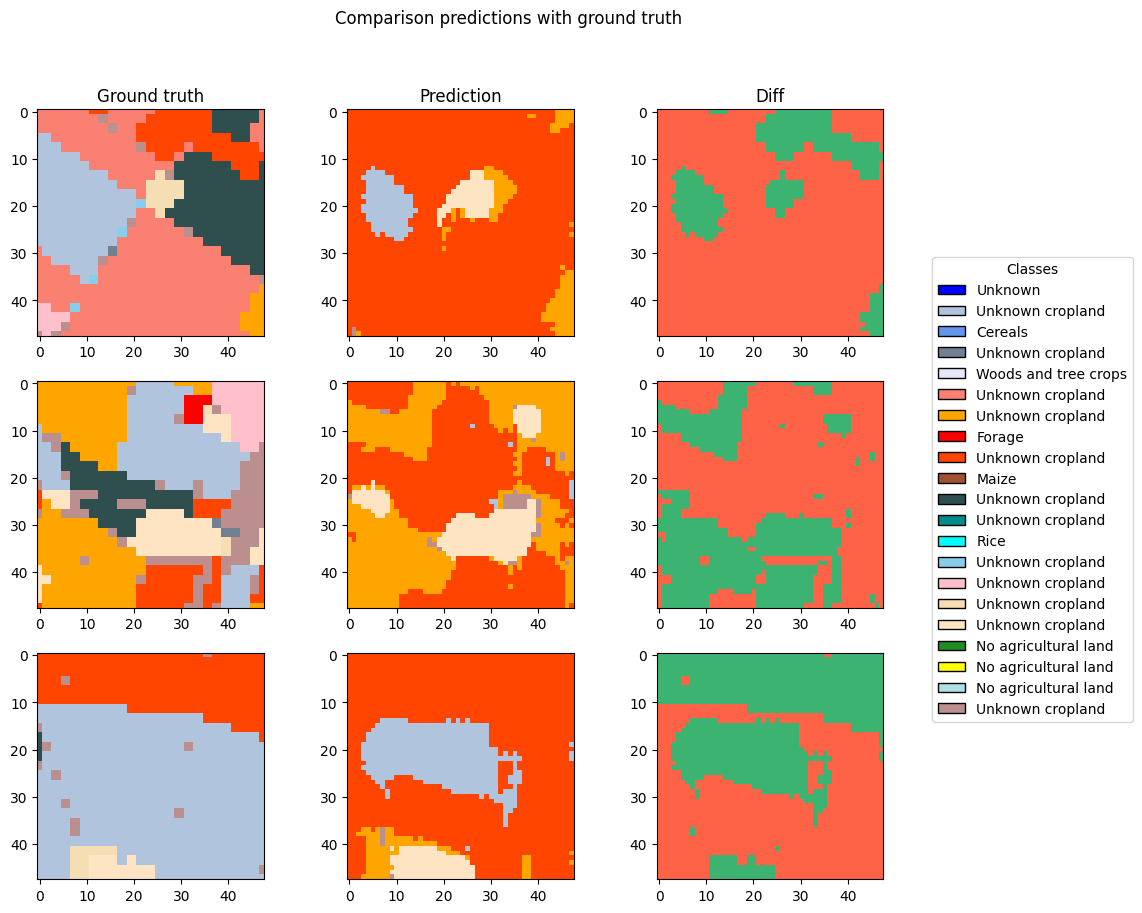

In [188]:
plot_comparison(y_truth_sparse, y_pred_sparse, 21, mapping)

# Temporal Unet model

In [286]:
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, MaxPool3D

def temporal_unet(TIMESTAMP, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((TIMESTAMP, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, 3, activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPool3D(2)(c1)

    c2 = Conv3D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPool3D(2)(c2)

    c3 = Conv3D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPool3D(2)(c3)

    c4 = Conv3D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPool3D((1,2,2))(c4)

    c5 = Conv3D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path

    u6 = Conv3DTranspose(128, (2,2,2), strides=(1,2,2), padding='same')(c5)

    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv3DTranspose(64, 2, strides=(3,2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv3DTranspose(32, 2, strides=2, padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    print(c8.shape)
    u9 = Conv3DTranspose(16, 2, strides=2, padding='same')(c8)
    u9 = concatenate([u9, c1])
    print(u9.shape)
    c9 = Conv3D(16, 3, activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, 3, activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    print(c9.shape)
    outputs = Conv3D(21, 1, activation='softmax', padding='same')(c9)
    print(outputs.shape)
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=metrics(21)) #Ignore class to exclude background
    model.summary()

    return model

In [287]:
model = temporal_unet(12, 48, 48, 9)

(None, 6, 24, 24, 32)
(None, 12, 48, 48, 32)
(None, 12, 48, 48, 16)
(None, 12, 48, 48, 21)


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 12, 48,    │          0 │ -                 │
│ (InputLayer)        │ 48, 9)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_240 (Conv3D) │ (None, 12, 48,    │      3,904 │ input_layer_24[0… │
│                     │ 48, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_161         │ (None, 12, 48,    │          0 │ conv3d_240[0][0]  │
│ (Dropout)           │ 48, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_241 (Conv3D) │ (None, 12, 48,    │      6,928 │ dropout_161[0][0] │
│                     │ 48, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_69    │ (None, 6, 24, 24, │          0 │ conv3d_241[0][0]  │
│ (MaxPooling3D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_242 (Conv3D) │ (None, 6, 24, 24, │     13,856 │ max_pooling3d_69… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_162         │ (None, 6, 24, 24, │          0 │ conv3d_242[0][0]  │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_243 (Conv3D) │ (None, 6, 24, 24, │     27,680 │ dropout_162[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_70    │ (None, 3, 12, 12, │          0 │ conv3d_243[0][0]  │
│ (MaxPooling3D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_244 (Conv3D) │ (None, 3, 12, 12, │     55,360 │ max_pooling3d_70… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_163         │ (None, 3, 12, 12, │          0 │ conv3d_244[0][0]  │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_245 (Conv3D) │ (None, 3, 12, 12, │    110,656 │ dropout_163[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_71    │ (None, 1, 6, 6,   │          0 │ conv3d_245[0][0]  │
│ (MaxPooling3D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_246 (Conv3D) │ (None, 1, 6, 6,   │    221,312 │ max_pooling3d_71… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_164         │ (None, 1, 6, 6,   │          0 │ conv3d_246[0][0]  │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_247 (Conv3D) │ (None, 1, 6, 6,   │    442,496 │ dropout_164[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_72    │ (None, 1, 3, 3,   │          0 │ conv3d_247[0][0]

 Total params: 5,648,709 (21.55 MB)

 Trainable params: 5,648,709 (21.55 MB)

 Non-trainable params: 0 (0.00 B)

In [246]:
X_temp = np.load('../data/kaggle_dataset/X_temporal.npy')
data_temp = scaling(X_temp, 2, clip=True, temporal=True)
data_temp = np.moveaxis(data_temp, 2, 4)
data_temp.shape

(3328, 12, 48, 48, 9)

In [296]:
y_cat_temp = np.stack([y_cat for i in range(12)], axis=1)

In [297]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(data_temp, y_cat_temp, test_size=0.2)

In [298]:
es = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=0
    )

history_temp = model.fit(
    X_train_temp,
    y_train_temp,
    validation_data=(X_test_temp, y_test_temp),
    batch_size=16,
    callbacks=[es],
    epochs=100)


Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - io_u_232: 9.0463e-05 - io_u_233: 0.0012 - io_u_234: 1.6588e-04 - io_u_235: 2.0710e-04 - io_u_236: 0.0026 - io_u_237: 4.1606e-04 - io_u_238: 0.0571 - io_u_239: 0.0000e+00 - io_u_240: 0.2993 - io_u_241: 0.0000e+00 - io_u_242: 1.5877e-04 - io_u_243: 0.0000e+00 - io_u_244: 2.2421e-04 - io_u_245: 0.0017 - io_u_246: 0.0038 - io_u_247: 0.0019 - io_u_248: 0.0018 - io_u_249: 0.0000e+00 - io_u_250: 0.0059 - io_u_251: 2.2091e-04 - io_u_252: 5.2997e-05 - loss: 2.5535 - mean_io_u_13: 0.0179 - val_io_u_232: 0.0000e+00 - val_io_u_233: 1.8341e-06 - val_io_u_234: 0.0000e+00 - val_io_u_235: 0.0000e+00 - val_io_u_236: 0.0000e+00 - val_io_u_237: 0.0000e+00 - val_io_u_238: 0.0000e+00 - val_io_u_239: 0.0000e+00 - val_io_u_240: 0.3425 - val_io_u_241: 0.0000e+00 - val_io_u_242: 0.0000e+00 - val_io_u_243: 0.0000e+00 - val_io_u_244: 0.0000e+00 - val_io_u_245: 0.0000e+00 - val_io_u_246: 0.0000e+00 - val_io_u_247: 0.0000e+00 - val_io_u_248: 0.0000e+00 - val_

KeyboardInterrupt: 